<a href="https://colab.research.google.com/github/Naufil-sayed/DVP/blob/main/spotify_topsongs_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# import data and visualise

df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## Check Top Data for Streamed Artists etc

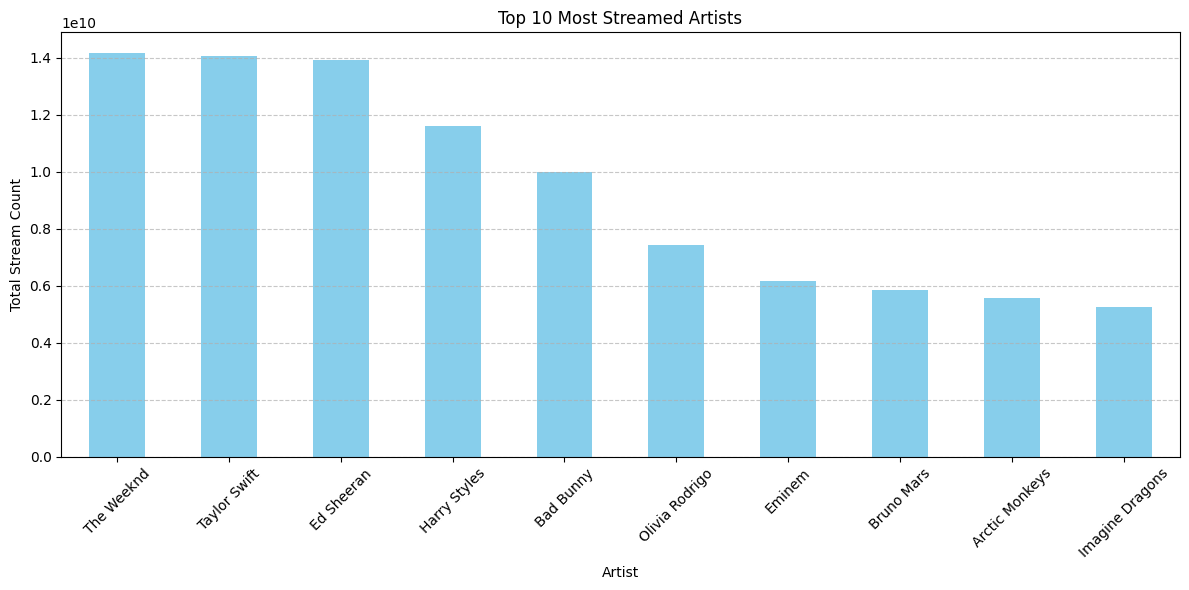

In [ ]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['streams'] = df['streams'].replace([np.inf, -np.inf], np.nan)
artist_streams = df.groupby('artist(s)_name')['streams'].sum()
artist_streams = artist_streams.sort_values(ascending=False)

top_n = 10
top_artists = artist_streams.head(top_n)

plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Total Stream Count')
plt.title(f'Top {top_n} Most Streamed Artists')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

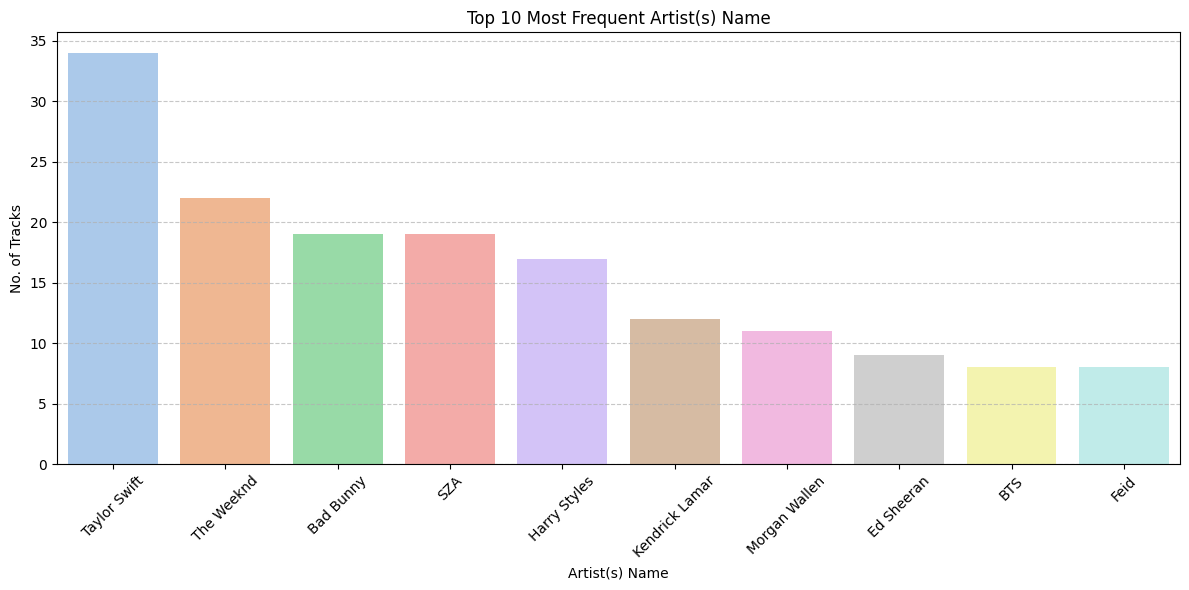

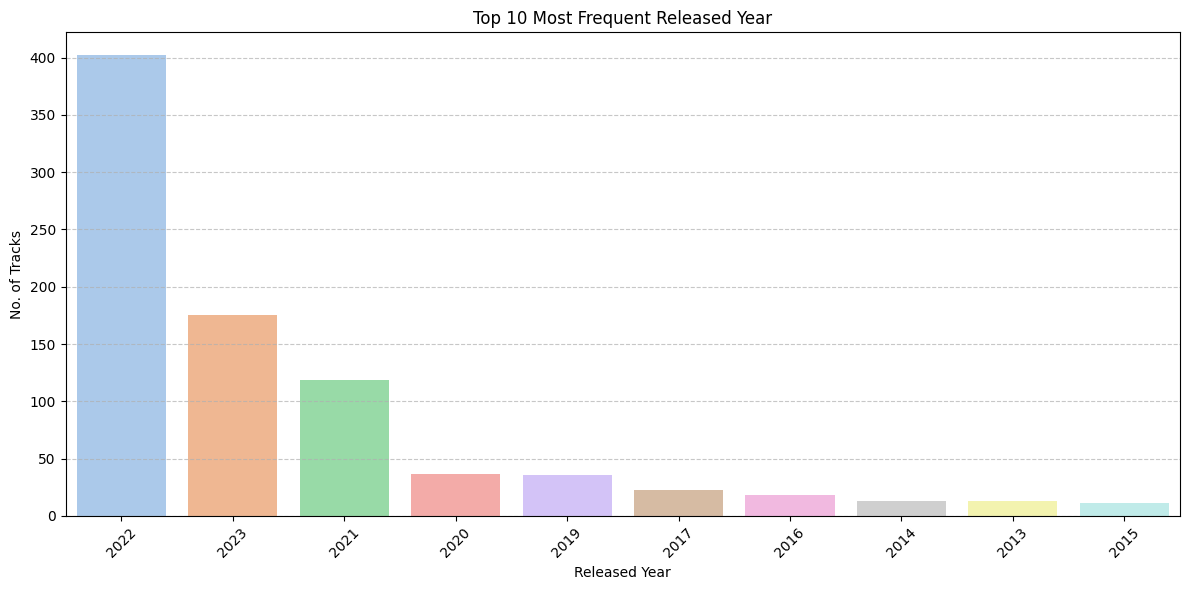

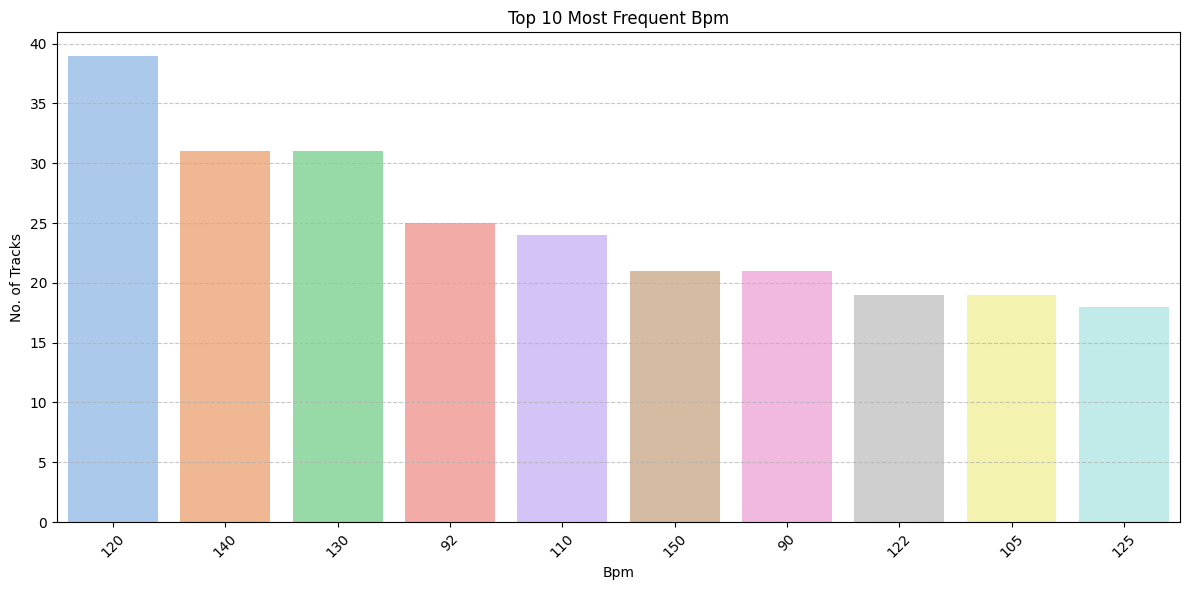

In [ ]:
plt_cols =  ['artist(s)_name', 'released_year', 'bpm']

def col_fname(column):
    words = column.split('_')
    formatted_words = [word.capitalize() for word in words]
    return ' '.join(formatted_words)

for i, col in enumerate(plt_cols):
    artist_counts = df[col].value_counts()
    top_n = artist_counts.head(10)
    col_name = col_fname(col)

    pastel_palette = sns.color_palette("pastel")

    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, order=top_n.index, palette=pastel_palette)
    plt.xlabel(col_name)
    plt.ylabel('No. of Tracks')
    plt.title(f'Top 10 Most Frequent {col_name}')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

## Normalise streams to "popularity" and check whether any correlations with other features exist

In [ ]:
min_value = df['streams'].min()
max_value = df['streams'].max()

df["popularity"] = (df['streams']-min_value)/(max_value-min_value)

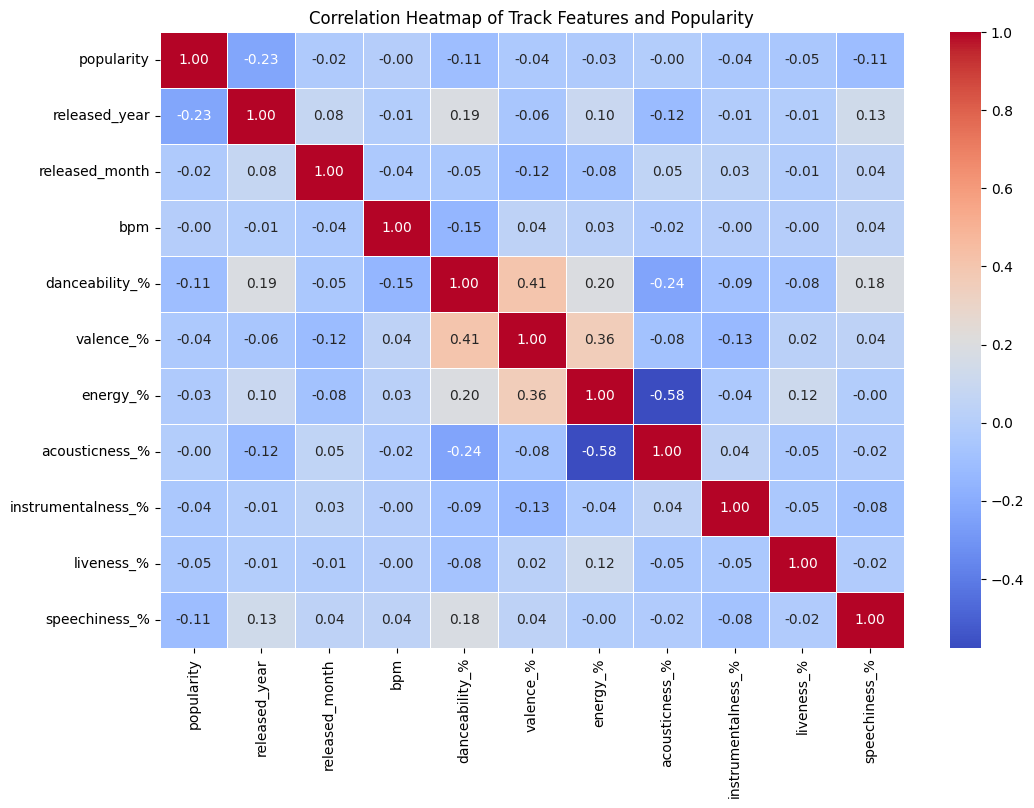

In [ ]:
df_features = df[['popularity', 'released_year', 'released_month', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

cor_max = df_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor_max, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Track Features and Popularity')
plt.show()

## Trends over time?

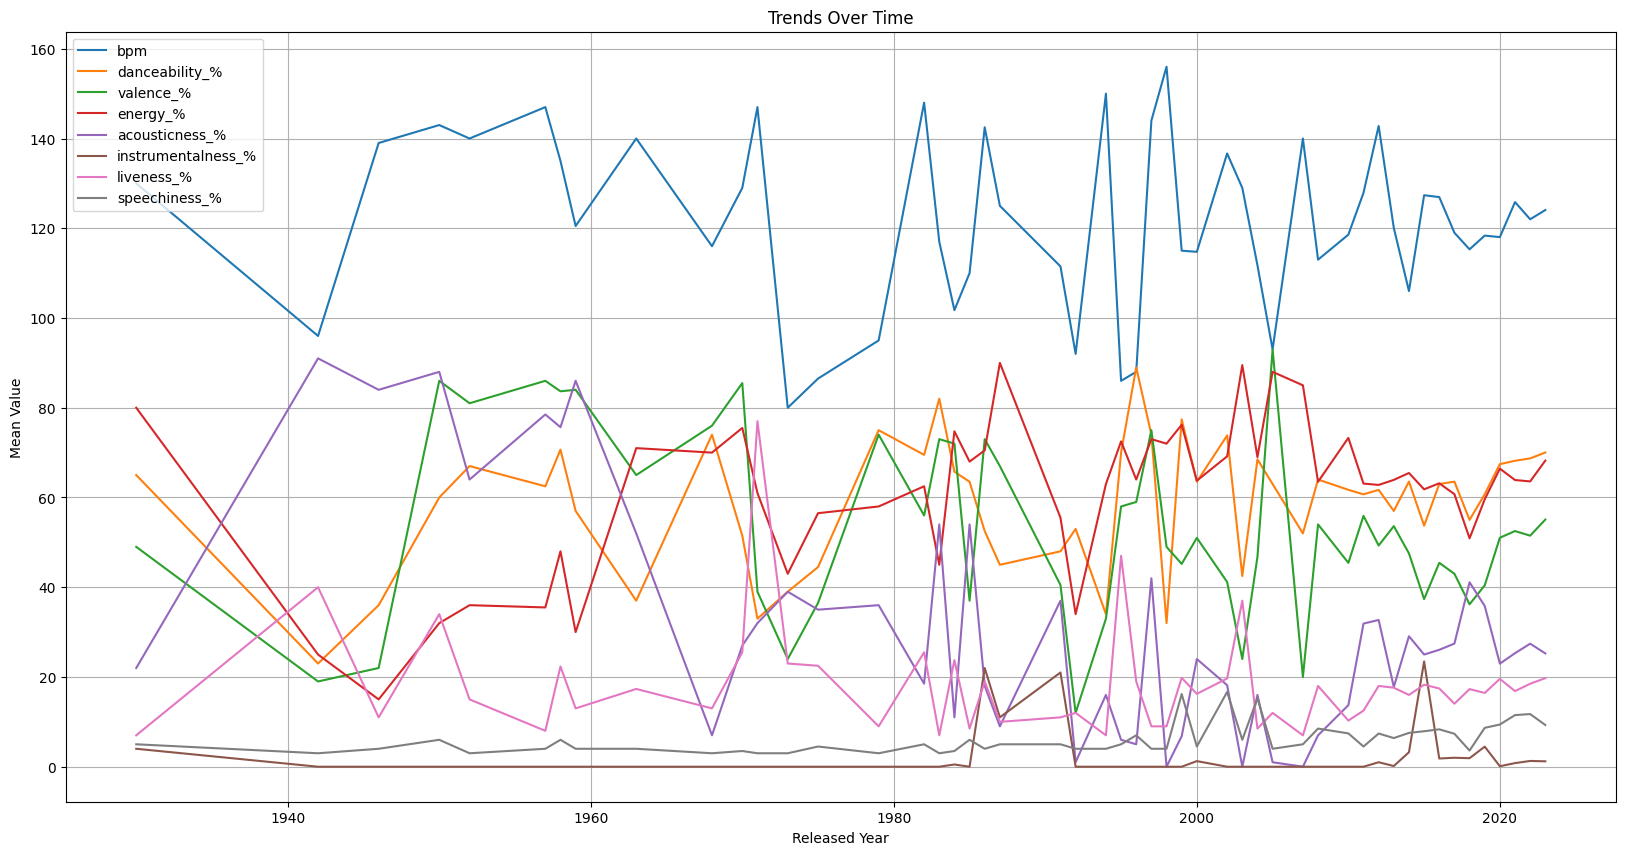

In [ ]:
df_features_2 = df[[ 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
                   'instrumentalness_%', 'liveness_%', 'speechiness_%', 'released_year']]

yearly_mean = df_features_2.groupby('released_year').mean()
yearly_mean = yearly_mean.reset_index()


plt.figure(figsize=(20, 10))

for feature in ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
                'instrumentalness_%', 'liveness_%', 'speechiness_%']:
    plt.plot(yearly_mean['released_year'], yearly_mean[feature], label=feature)


plt.xlabel('Released Year')
plt.ylabel('Mean Value')
plt.title('Trends Over Time')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()


## What features have changed the most during the years?

In [ ]:
yearly_std = df_features_2.groupby('released_year').std()
mean_std = yearly_std.mean()
mean_std_sorted = mean_std.sort_values(ascending=False)

print(mean_std_sorted)

bpm                   26.608404
valence_%             22.429113
acousticness_%        21.197322
energy_%              15.284138
danceability_%        12.252413
liveness_%            11.249965
instrumentalness_%     5.239916
speechiness_%          5.094914
dtype: float64


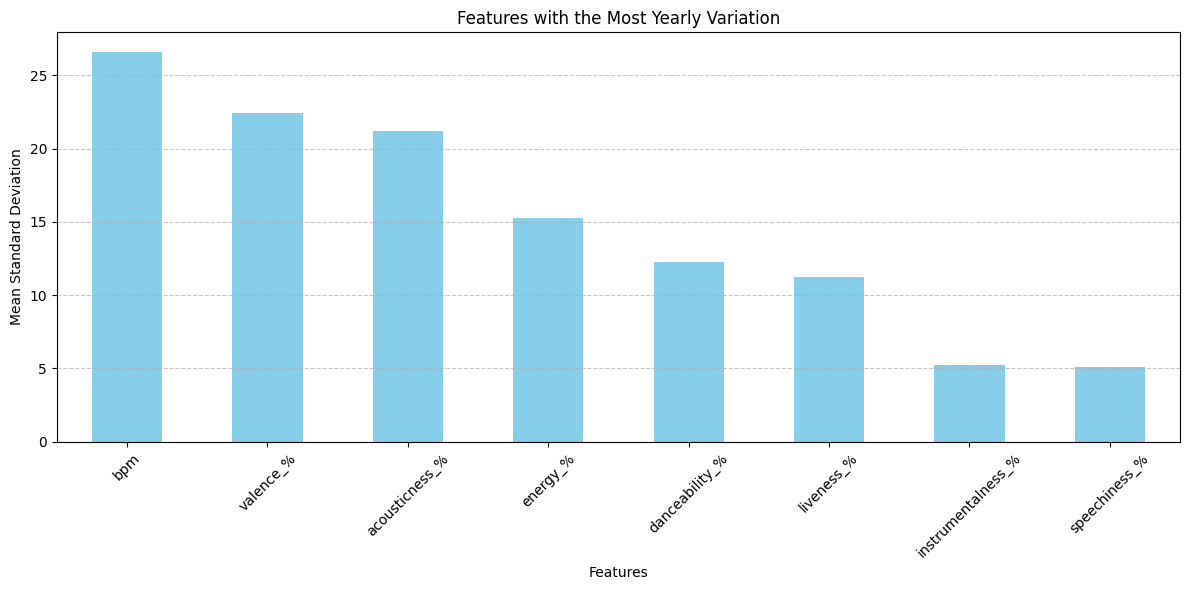

In [ ]:
plt.figure(figsize=(12, 6))
mean_std_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Mean Standard Deviation')
plt.title('Features with the Most Yearly Variation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Mean Feature Values of the Top 10 Most Popular Songs of Each Decade

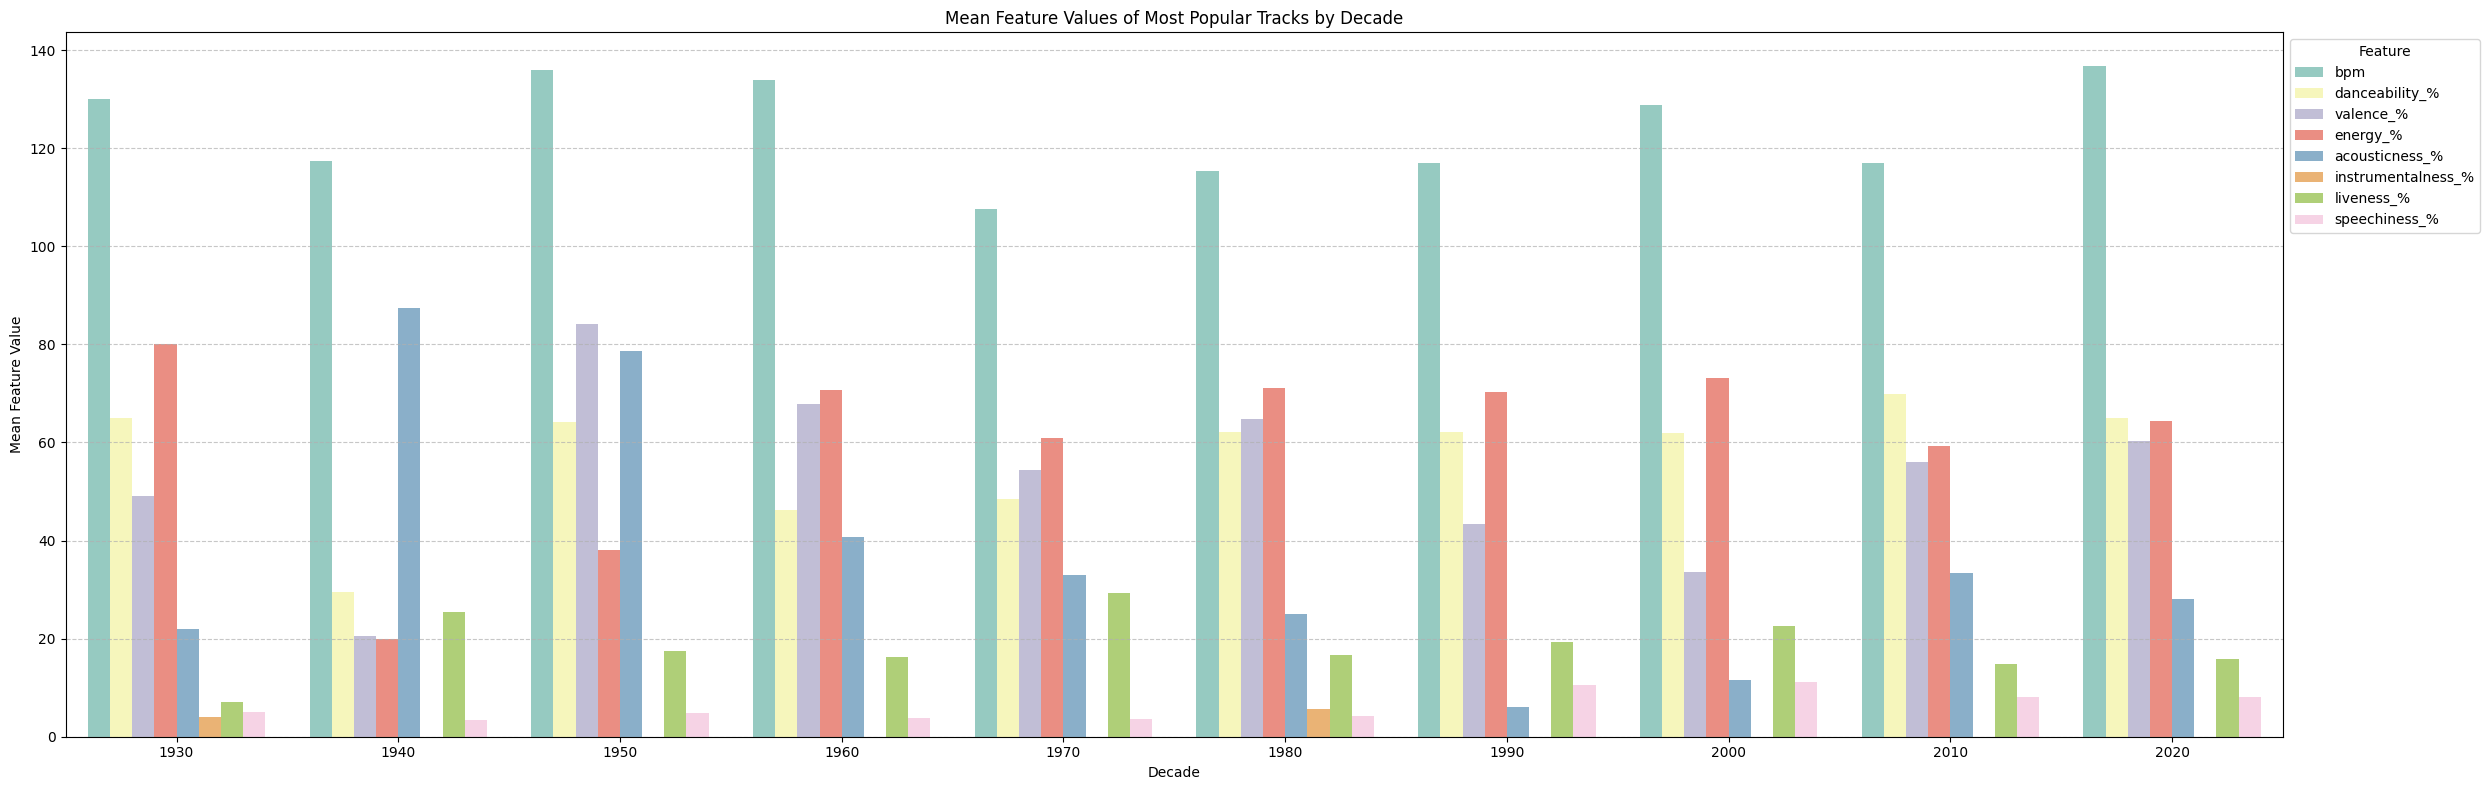

In [ ]:
# add decade column
df['decade'] = (df['released_year'] // 10) * 10

df_sorted = df.sort_values(by=['decade', 'popularity'], ascending=[True, False])
decade_groups = df_sorted.groupby('decade')

top_10_decade = pd.DataFrame()

for name, group in decade_groups:
    top_10_decade = pd.concat([top_10_decade, group.head(10)])

top_10_decade = top_10_decade.reset_index(drop=True)

# select columns of interest
cols_i = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
                        'instrumentalness_%', 'liveness_%', 'speechiness_%', 'decade']

df_selected = top_10_decade[cols_i]

# calculate the mean
mean_feat_decade = df_selected.groupby('decade').mean()
mean_feat_decade = mean_feat_decade.reset_index()


mean_feat_long = mean_feat_decade.melt(id_vars=['decade'], var_name='Feature')

# plot

plt.figure(figsize=(25, 8))
sns.barplot(x='decade', y='value', hue='Feature', data=mean_feat_long, palette='Set3')


plt.xlabel('Decade')
plt.ylabel('Mean Feature Value')
plt.title('Mean Feature Values of Most Popular Tracks by Decade')
plt.legend(title='Feature', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()